In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

In [6]:
# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
dataset = pd.read_csv(url)

In [7]:
# Display the first few rows of the dataset
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# Define features (X) and target (y)
x = dataset[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]]
y = dataset[["CO2EMISSIONS"]]

In [9]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Initialize and train the Linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = reg.predict(x_test)

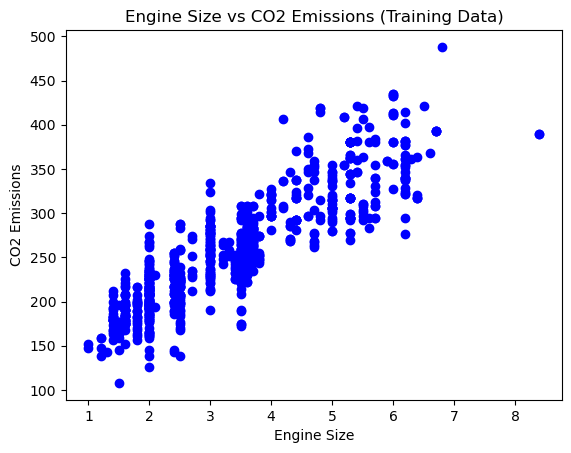

In [12]:
# Plot the scatter plot for ENGINESIZE vs CO2EMISSIONS (training data)
plt.scatter(x_train["ENGINESIZE"], y_train, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Engine Size vs CO2 Emissions (Training Data)")
plt.show()

In [13]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 577.1464417119639
R-squared (R2): 0.8632835658035742


In [15]:
# Predict CO2 emissions for new car data
new_data = pd.DataFrame([[4, 5, 10]], columns=["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"])
predicted_emissions = reg.predict(new_data)
print("Predicted CO2 Emissions:", predicted_emissions[0][0])  # Extracting single value

Predicted CO2 Emissions: 234.14409184426987
